 # Small Image Classification Using Convolutional Neural Network (CNN) 

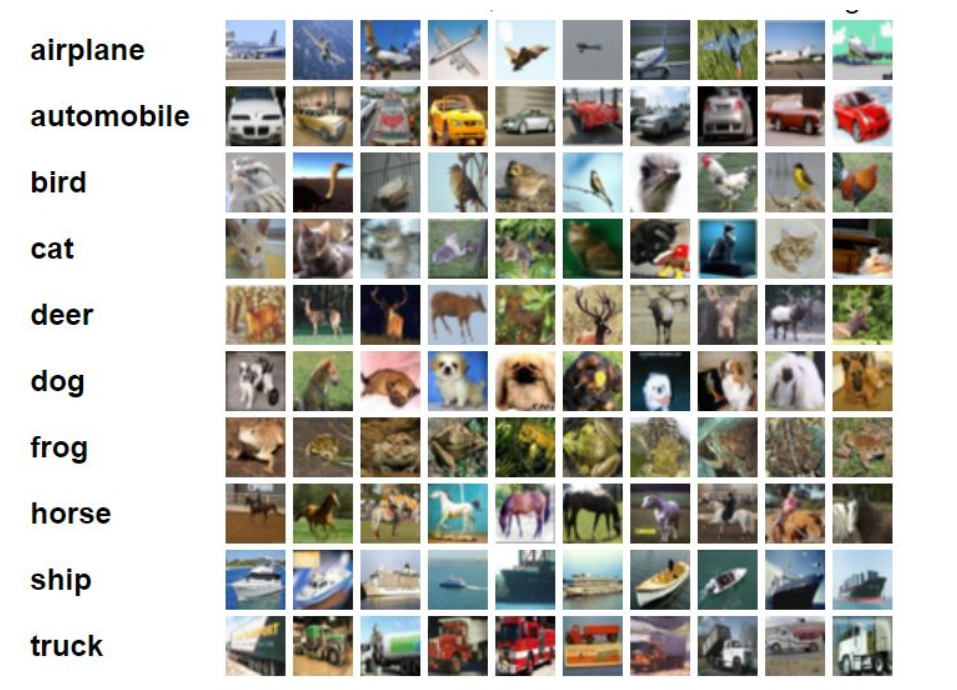

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [12]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# convert 1 dimensional array using reshape

In [6]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

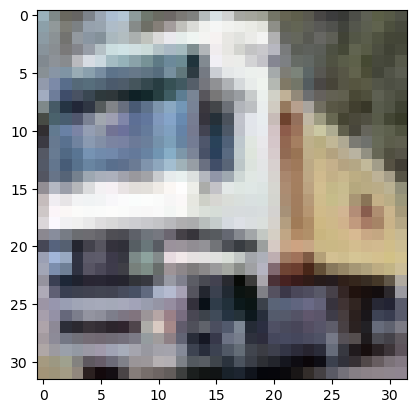

In [11]:
  plt.imshow(X_train[1])

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

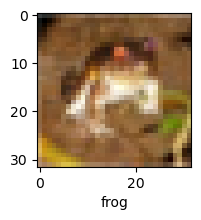

In [15]:
plot_sample(X_train, y_train, 0)

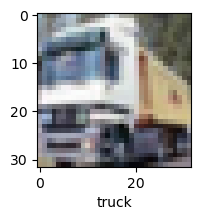

In [17]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\rakes\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3019 - loss: 1.9325
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4253 - loss: 1.6347
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4553 - loss: 1.5486
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4753 - loss: 1.4888
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4921 - loss: 1.4336


# What kind of loss use=====> categorical_crossentropy or sparse_categorical_crossentropy

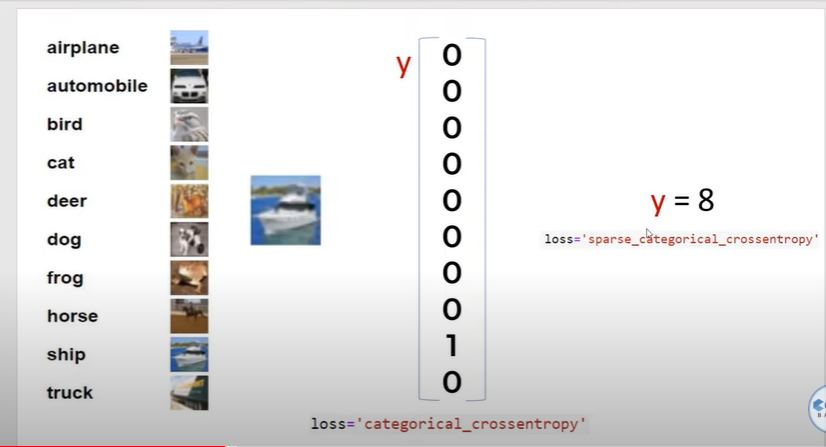

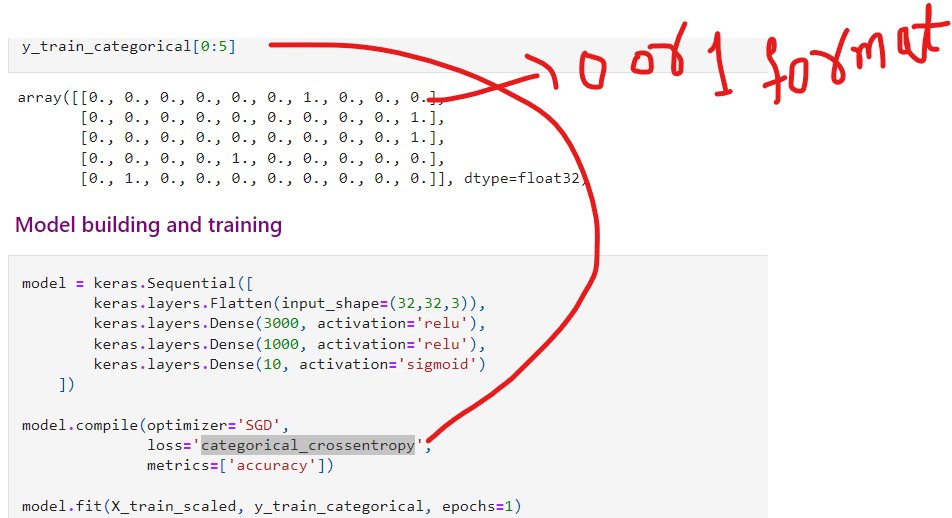

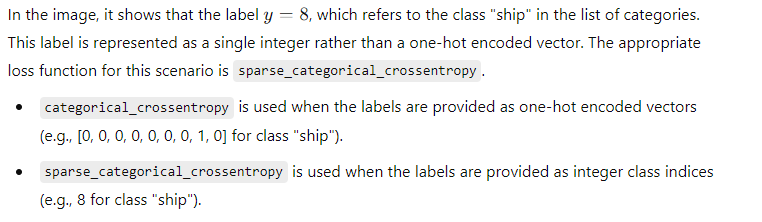

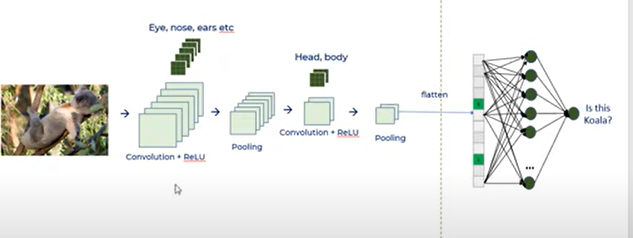

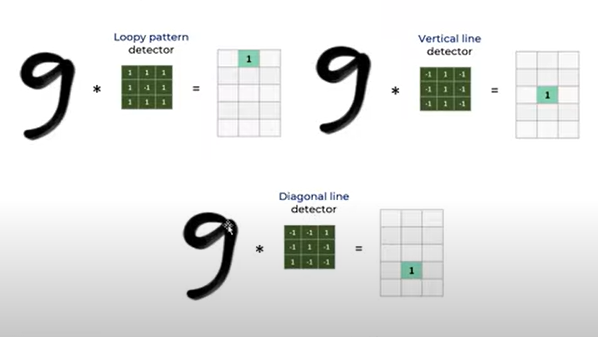

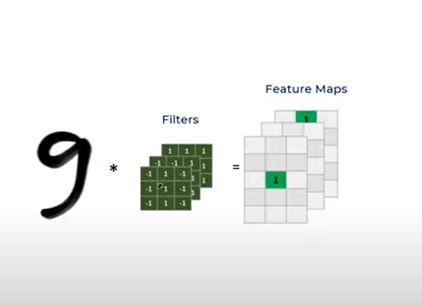

In [20]:
# IN below code 32 filter means 32 feature or 32 edge we have to detect

# Now, we use CNN  to improve accuracy because using ANN we got accuracy 48 % see in epoc fig  and F1 score below fig  47 % in cnn in cnn computation is less than simple ann as we use max pooling

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.62      0.57      1000
           1       0.64      0.58      0.61      1000
           2       0.49      0.17      0.26      1000
           3       0.32      0.46      0.38      1000
           4       0.47      0.30      0.37      1000
           5       0.49      0.26      0.34      1000
           6       0.47      0.63      0.54      1000
           7       0.42      0.66      0.52      1000
           8       0.71      0.50      0.59      1000
           9       0.47      0.65      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



# Now let us build a convolutional neural network to train our images

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\rakes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3796 - loss: 1.7142
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5853 - loss: 1.1683
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6554 - loss: 0.9978
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6870 - loss: 0.9039
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7085 - loss: 0.8430
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7242 - loss: 0.7823
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7521 - loss: 0.7167
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7633 - loss: 0.6821
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7784 - loss: 0.6369
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7964 - loss: 0.5948


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.15607829e-04, 1.08606525e-06, 1.01589970e-02, 8.48753631e-01,
        1.53251807e-04, 9.96515006e-02, 2.82377396e-02, 4.66989013e-06,
        1.29203964e-02, 3.15160469e-06],
       [7.05716957e-04, 5.02348244e-02, 2.89502577e-06, 1.59324698e-09,
        6.71160816e-09, 1.09499953e-11, 7.16325499e-10, 2.77741219e-10,
        9.49032128e-01, 2.43152772e-05],
       [2.21811049e-02, 4.15401831e-02, 4.01546364e-04, 2.88529351e-04,
        3.86474203e-05, 3.54299737e-05, 1.08644099e-05, 2.80388165e-04,
        9.31245148e-01, 3.97813460e-03],
       [9.35634077e-01, 5.04577591e-04, 2.98371725e-02, 3.11192591e-04,
        4.38234117e-03, 8.87957867e-06, 1.07994365e-05, 7.93231229e-05,
        2.91699246e-02, 6.15448662e-05],
       [3.44857426e-07, 3.16152218e-05, 2.83761299e-03, 9.78593342e-03,
        1.83803767e-01, 3.45732528e-03, 8.00044835e-01, 9.63430284e-06,
        2.87914463e-05, 1.75555286e-08]], dtype=float32)

In [29]:
np.argmax(y_pred[1])

8

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

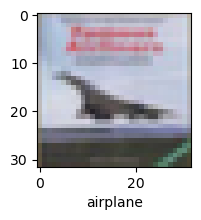

In [32]:
plot_sample(X_test, y_test,3)

In [33]:
classes[y_classes[3]]

'airplane'

In [34]:
classes[y_classes[3]]

'airplane'